In [1]:
import pandas as pd
air = pd.read_csv("G:\\XX\\Data\\air_data.csv", encoding='UTF-8')
data = air.describe(include='all').T
data['null'] = len(air)-data['count']
data = data[['null', 'max', 'min']]
print(data)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,8,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                         null       max   min
MEMBER_NO                   0       NaN   NaN
FFP_DATE                    4       NaN   NaN
FIRST_FLIGHT_DATE           4       NaN   NaN
GENDER                      7       NaN   NaN
FFP_TIER                    4         6     4
WORK_CITY                2273       NaN   NaN
WORK_PROVINCE            3248       NaN   NaN
WORK_COUNTRY               30       NaN   NaN
AGE                       424       NaN   NaN
LOAD_TIME                   4       NaN   NaN
FLIGHT_COUNT                4     27642     2
BP_SUM                      4    505308     0
EP_SUM_YR_1                 4         0     0
EP_SUM_YR_2                 4     74460     0
SUM_YR_1                  555    239560     0
SUM_YR_2                  142    234188     0
SEG_KM_SUM                  4    580717   368
WEIGHTED_SEG_KM             4       NaN   NaN
LAST_FLIGHT_DATE            4       NaN   NaN
AVG_FLIGHT_COUNT            4   3455.25  0.25
AVG_BP_SUM                  4   63

In [2]:
air=air[air['SUM_YR_1'].notnull() & air['SUM_YR_2'].notnull()]
index1=air['SUM_YR_1']!=0
index2=air['SUM_YR_2']!=0
index3=(air['SEG_KM_SUM']==0)&(air['avg_discount']==0)
air=air[index1 | index2 | index3]
air.to_excel("G:\\XX\\Data\\air_data_clean.xls")

In [3]:
# 属性规约提取
import numpy as np
air_clean = pd.read_csv("G:\\XX\\Data\\air_data_clean.csv", encoding='UTF-8')
data = air_clean[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
ffp = pd.to_datetime(data['FFP_DATE'])
load = pd.to_datetime(data['LOAD_TIME'])
ffp_to_load = load - ffp
data2 = data.copy()
data2['L'] = ffp_to_load.map(lambda x: x / np.timedelta64(30 * 24 * 60, 'm'))
data2['R'] = data['LAST_TO_END']
data2['F'] = data['FLIGHT_COUNT']
data2['M'] = data['SEG_KM_SUM']
data2['C'] = data['avg_discount']
data3 = data2[['L', 'R', 'F', 'M', 'C']]
print(data3)

                L    R    F       M         C
0       90.200000    1  210  580717  0.961639
1       86.566667    7  140  293678  1.252314
2       87.166667   11  135  283712  1.254676
3       68.233333   97   23  281336  1.090870
4       60.533333    5  152  309928  0.970658
5       74.700000   79   92  294585  0.967692
6       97.700000    1  101  287042  0.965347
7       48.400000    3   73  287230  0.962070
8       34.266667    6   56  321489  0.828478
9       45.500000   15   64  375074  0.708010
10      40.966667   22   43  262013  0.988658
11     114.166667    6  145  271438  0.952535
12      89.500000   67   29  321529  0.799127
13      90.466667    3  118  179514  1.398382
14      50.633333    2   50  270067  0.921985
15      73.133333   65   22  234721  1.026085
16      45.166667    7  101  172231  1.386525
17      41.233333   45   40  284160  0.837844
18      97.200000    2   64  169358  1.401596
19      31.500000   24   38  332896  0.708285
20      69.000000    4  106  16711

In [4]:
# 数据标准化处理
data4 = (data3 - data3.mean(axis=0)) / data3.std(axis=0)
data4.columns = ['S' + i for i in data3.columns]
print(data4)

             SL        SR         SF         SM        SC
0      1.435838 -0.944959  14.032893  26.759032  1.295725
1      1.307280 -0.911907   9.072463  13.125799  2.868540
2      1.328510 -0.889872   8.718147  12.652453  2.881316
3      0.658595 -0.416127   0.781460  12.539602  1.994978
4      0.386148 -0.922924   9.922823  13.897610  1.344525
5      0.887404 -0.515283   5.671026  13.168878  1.328480
6      1.701209 -0.944959   6.308796  12.810615  1.315786
7     -0.043164 -0.933942   4.324624  12.819544  1.298058
8     -0.543241 -0.917416   3.119948  14.446713  0.575205
9     -0.145774 -0.867838   3.686854  16.991791 -0.076636
10    -0.306176 -0.829277   2.198725  11.621835  1.441922
11     2.283846 -0.917416   9.426780  12.069486  1.246463
12     1.411070 -0.581387   1.206639  14.448613  0.416389
13     1.445273 -0.933942   7.513471   7.703454  3.658896
14     0.035858 -0.939450   2.694768  12.004368  1.081160
15     0.831971 -0.592404   0.710597  10.325571  1.644433
16    -0.15756

<IPython.core.display.Javascript object>


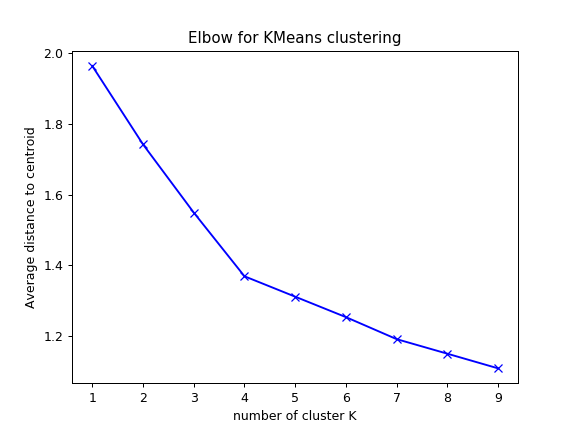

In [10]:
# 肘部法则计算绘图
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
K = range(1,10)
meandistortion = []
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data4)
    meandistortion.append((sum(np.min(cdist(data4,kmeans.cluster_centers_,'euclidean'), axis =1))) / data4.shape[0])
plt.plot(K, meandistortion,'bx-')
plt.xlabel('number of cluster K')
plt.ylabel(u'Average distance to centroid')
plt.title(u'Elbow for KMeans clustering')

<IPython.core.display.Javascript object>


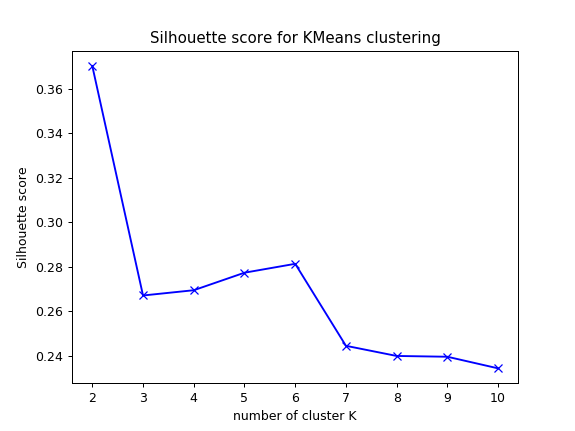

In [11]:
# 轮廓系数评估绘图
%matplotlib notebook
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
K = range(2,11)
scores=[]
for k in K:
    kmeans = KMeans(n_clusters=k).fit(data4)
    score = metrics.silhouette_score(data4, kmeans.labels_, metric ='euclidean')
    scores.append(score)
plt.plot(K, scores, 'bx-')
plt.xlabel('number of cluster K')
plt.ylabel(u'Silhouette score')
plt.title(u'Silhouette score for KMeans clustering')

In [41]:
# 选择聚类数K=5进行KMeans聚类
model = KMeans(n_clusters=5)
model.fit(data4)
# 查看聚类中心和各类别的聚类个数
r1 = pd.Series(model.labels_).value_counts()
r2 = pd.DataFrame(model.cluster_centers_)
r = pd.concat([r2, r1], axis=1)
r.columns = list(data4.columns) + ['Category Amount']
# r = pd.concat([data4, pd.Series(model.labels_, index=data4.index)], axis=1)
# r.columns = list(data4.columns) + ['聚类类别']
print(r) 

         SL        SR        SF        SM        SC  Category Amount
0 -0.700123 -0.414902 -0.161152 -0.161001 -0.254932            24655
1 -0.313674  1.686172 -0.573992 -0.536815 -0.172924            12123
2  0.483446 -0.799400  2.482949  2.424488  0.308702             5336
3  1.160854 -0.377152 -0.086996 -0.094873 -0.156031            15738
4  0.051333 -0.003139 -0.226689 -0.231099  2.192264             4180


<IPython.core.display.Javascript object>


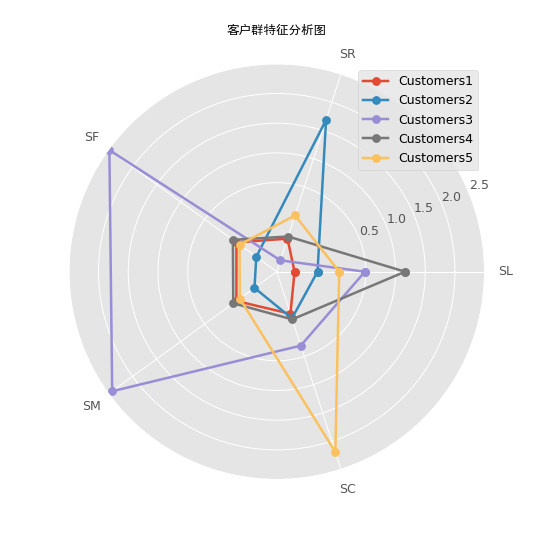

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


In [51]:
plt.style.use('ggplot')
plt.rcParams['font.sans-serif']='simkai'
plt.rcParams['axes.unicode_minus']=False
labels = np.array(['SL', 'SR', 'SF', 'SM', 'SC'])
# datalen = 5
N = len(r2)

angles = np.linspace(0, 2*np.pi, N, endpoint=False)
data = pd.concat([r2, r2.ix[:, 0]], axis=1)
angles = np.concatenate((angles, [angles[0]]))
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
for i in range(0,5):
    j = i+1
    ax.plot(angles, data.ix[i,:],'o-', linewidth=2, label="Customers{0}".format(j))
    
ax.set_thetagrids(angles*180/np.pi, labels)
ax.set_title("客户群特征分析图", va='bottom', fontproperties="SimHei")
ax.set_rlim(-1, 2.5)
ax.grid(True)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


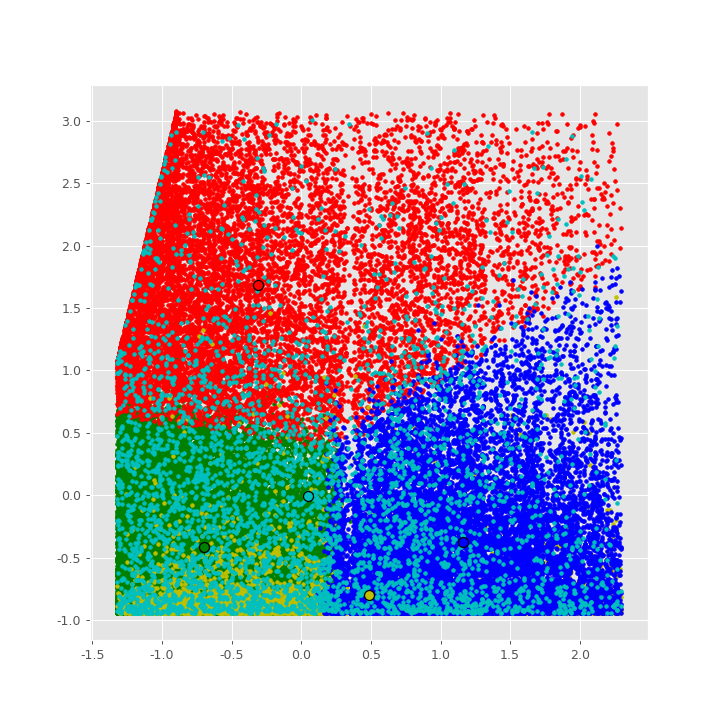

In [57]:
# 主成分分析降维 k-means聚类可视化
from sklearn.decomposition import PCA
def getPCAData(data,comp):
    pcaClf = PCA(n_components=comp, whiten=True)
    pcaClf.fit(data)
    data_PCA = pcaClf.transform(data)  # 用来降低维度
    return data_PCA

def modiData(data):
    x1=[]
    x2=[]
    for i in range(0,len(data+1)):
        x1.append(data[i][0])
        x2.append(data[i][1])
    x1=np.array(x1)
    x2=np.array(x2)
    #重塑数据
    X=np.array(list(zip(x1,x2))).reshape(len(x1),2)
    return X

def drawKmodel(XData,t):
    pre=model.predict(data4)
    plt.figure(figsize=(8,8))
    colors = ['g','r','y','b','c']
#     markers = ['o','s','d','h','p']
    kmeans_model = KMeans(n_clusters=t).fit(XData)
#     for i,l in enumerate(kmeans_model.labels_):
#         plt.plot(XData[i][0],XData[i][1],color=colors[l],marker=markers[l],ls='None')
#         plt.title('%s K-Means'%(len(XData)))
    for j in range(5):
        index_set=np.where(pre==j)
        cluster=data4.iloc[index_set]
        plt.scatter(cluster.iloc[:,0],cluster.iloc[:,1],c=colors[j],marker='.')  
        plt.plot(centers[j][0],centers[j][1],'o',markerfacecolor=colors[j],markeredgecolor='k',markersize=8)  #画类别中心
    plt.show()

dataPCA = getPCAData(data4,2)
dataX = modiData(dataPCA)
drawKmodel(dataX,5)